In [2]:
%pip install fonttools seaborn matplotlib pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import glob
import platform
from fontTools.ttLib import TTFont, TTCollection


In [4]:
def count_glyphs(font_path):
    glyph_set = set()
    try:
        if font_path.lower().endswith(".ttc"):
            ttc = TTCollection(font_path)
            for font in ttc.fonts:
                for table in font["cmap"].tables:
                    glyph_set.update(table.cmap.keys())
        else:
            font = TTFont(font_path)
            for table in font["cmap"].tables:
                glyph_set.update(table.cmap.keys())
    except Exception as e:
        print(f"Error processing {font_path}: {e}")
    return len(glyph_set)


In [5]:
def get_fonts_from_directory(directory):
    font_paths = []
    for extension in ["*.ttf", "*.otf", "*.ttc"]:
        font_paths.extend(glob.glob(os.path.join(directory, extension)))
    return font_paths


In [6]:
def get_all_fonts():
    system_fonts = []
    user_fonts = []

    if platform.system() == "Windows":
        system_fonts_dir = os.path.join(os.environ["WINDIR"], "Fonts")
        user_fonts_dir = os.path.expanduser(
            "~\\AppData\\Local\\Microsoft\\Windows\\Fonts"
        )
        system_fonts = get_fonts_from_directory(system_fonts_dir)
        user_fonts = get_fonts_from_directory(user_fonts_dir)
    elif platform.system() == "Darwin":
        system_fonts_dir = "/System/Library/Fonts"
        user_fonts_dir = os.path.expanduser("~/Library/Fonts")
        system_fonts = get_fonts_from_directory(system_fonts_dir)
        user_fonts = get_fonts_from_directory(user_fonts_dir)
    elif platform.system() == "Linux":
        system_fonts_dirs = ["/usr/share/fonts", "/usr/local/share/fonts"]
        user_fonts_dir = os.path.expanduser("~/.fonts")
        for dir in system_fonts_dirs:
            system_fonts.extend(get_fonts_from_directory(dir))
        user_fonts = get_fonts_from_directory(user_fonts_dir)

    return system_fonts + user_fonts


fonts = get_all_fonts()


In [7]:
famous_fonts = [
    "FOT-DNPShueiMinPr6N-B",
    "FOT-TsukuMinPr6N-R",
    "meiryo",
    "YuGothR",
    "msmincho",
    "yumin",
    "msgothic",
    "FOT-TsukuGoPro-R",
    "LINESeedJP_OTF_Rg",
    "ipaexm",
    "ipaexg",
    "BIZ-UDGothicR",
    "BIZ-UDMinchoM",
    "cambria",
    "segoeui",
    "times",
    "arial",
    "consola",
    "verdana",
    "comic",
    "impact",
    "georgia",
]


def filter_famous_fonts(fonts):
    famous_fonts_lower = [font.lower() for font in famous_fonts]
    filtered_fonts = [
        font
        for font in fonts
        if os.path.basename(font).split(".")[0].lower() in famous_fonts_lower
    ]
    return filtered_fonts


filtered_fonts = filter_famous_fonts(fonts)


In [8]:
font_glyph_counts = []

for font_path in filtered_fonts:
    glyph_count = count_glyphs(font_path)
    font_glyph_counts.append((os.path.basename(font_path), glyph_count))

font_glyph_counts


[('arial.ttf', 3443),
 ('comic.ttf', 742),
 ('consola.ttf', 2524),
 ('georgia.ttf', 657),
 ('impact.ttf', 720),
 ('ipaexg.ttf', 11999),
 ('ipaexm.ttf', 11999),
 ('segoeui.ttf', 3995),
 ('times.ttf', 3715),
 ('verdana.ttf', 938),
 ('yumin.ttf', 16133),
 ('LINESeedJP_OTF_Rg.otf', 14584),
 ('BIZ-UDGothicR.ttc', 11619),
 ('BIZ-UDMinchoM.ttc', 11619),
 ('cambria.ttc', 4650),
 ('meiryo.ttc', 17189),
 ('msgothic.ttc', 16127),
 ('msmincho.ttc', 16134),
 ('YuGothR.ttc', 16538),
 ('FOT-DNPShueiMinPr6N-B.otf', 20746),
 ('FOT-TsukuGoPro-R.otf', 16098),
 ('FOT-TsukuMinPr6N-R.otf', 20566)]

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


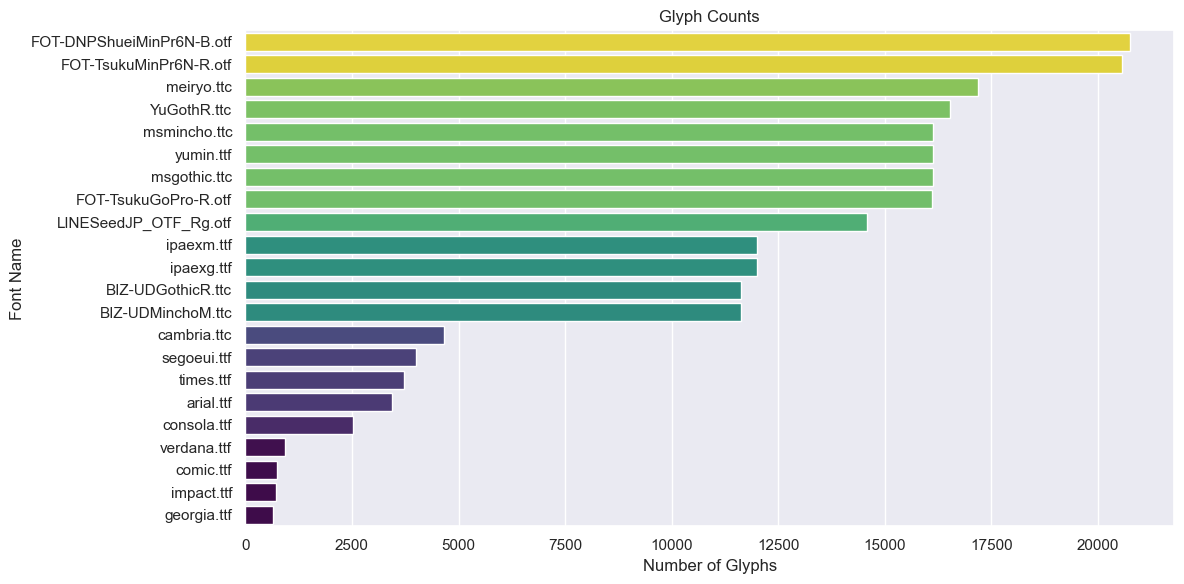

In [10]:
df = pd.DataFrame(font_glyph_counts, columns=["FontName", "GlyphCount"])

norm = Normalize(vmin=df["GlyphCount"].min(), vmax=df["GlyphCount"].max())
cmap = plt.get_cmap("viridis")

df["Color"] = df["GlyphCount"].apply(lambda x: cmap(norm(x)))

sns.set_theme(style="darkgrid", palette="muted")

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=df.sort_values(by="GlyphCount", ascending=False),
    x="GlyphCount",
    y="FontName",
    hue="FontName",
    palette=df.set_index("FontName")["Color"].to_dict(),
    legend=False,
)
plt.title("Glyph Counts")
plt.xlabel("Number of Glyphs")
plt.ylabel("Font Name")
plt.tight_layout()
plt.savefig("glyph_counts.pdf", format="pdf")
plt.show()
